# **Import Library**

In [1]:
from google.colab import files

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
import numpy as py

import os
import shutil

# **Download dataset melalui library kaggle**

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bayuabdurrosyidyeye","key":"cacb9462b3857900bcc2d1b7e55bb043"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d madisona/translated-animals10

 99% 583M/586M [00:19<00:00, 32.9MB/s]
100% 586M/586M [00:19<00:00, 30.8MB/s]


In [6]:
!mkdir animals
!unzip -qq translated-animals10.zip -d animals
dir = '/content/animals/animals10/raw-img'

# **Menyeleksi label yang akan diolah**

In [7]:
ignore = ['squirrel', 'spider', 'butterfly', 'chicken', 'elephant', 'horse']

for x in ignore:
  path = os.path.join(dir, x)
  shutil.rmtree(path)

print(os.listdir(dir))

['cat', 'cow', 'sheep', 'dog']


# **Image preprocessing**

In [8]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
    validation_split = 0.2
)

# **Pembagian dataset ke training dan validation**

In [9]:
w = 150
h = 150

train_dataset = datagen.flow_from_directory(
    dir,
    class_mode='categorical',
    subset = 'training',
    target_size = (w, h),
    batch_size = 256
)

validation_dataset = datagen.flow_from_directory(
    dir,
    class_mode='categorical',
    subset = 'validation',
    target_size = (w, h),
    batch_size = 256
)

Found 8175 images belonging to 4 classes.
Found 2042 images belonging to 4 classes.


# **Visualisasi Dataset**

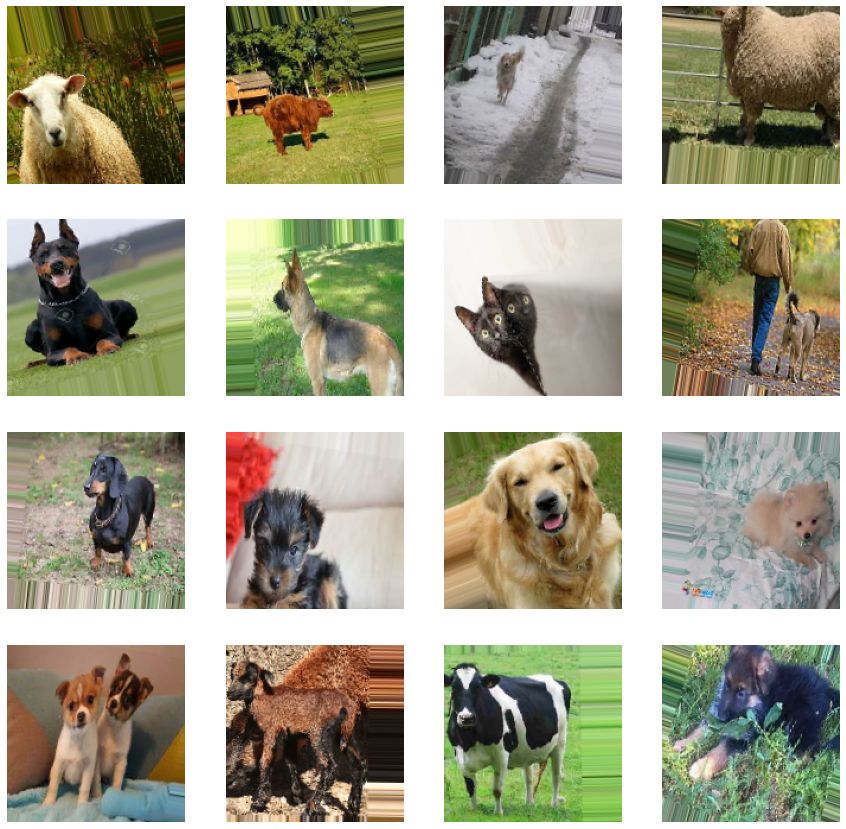

In [28]:
plt.figure(figsize=(15, 15))
for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_dataset[0][0][i])
  plt.axis('off')

# **Membuat model**

In [10]:
model = Sequential(
    [
     layers.Conv2D(64, (3,3), activation='relu', input_shape=(w, h, 3)),
     layers.MaxPooling2D(2, 2),
     layers.Conv2D(64, (3, 3), activation='relu'),
     layers.MaxPooling2D(2, 2),
     layers.Conv2D(128, (3, 3), activation='relu'),
     layers.MaxPooling2D(2, 2),
     layers.Conv2D(256, (3, 3), activation='relu'),
     layers.MaxPooling2D(2, 2),
     layers.Dropout(0.2),
     layers.Flatten(),
     layers.Dense(512, activation = 'relu'),
     layers.Dense(256, activation = 'relu'),
     layers.Dense(4, activation = 'softmax')
    ]
)

# **Kompilasi Model**

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# **Callback**

In [12]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epocj, logs = None):
    if (logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      print('Akurasi telah mencapai 90%!')
      self.model.stop_training = True

# **Model fitting**

In [13]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 40,
    verbose = 2,
    callbacks = [callback()]    
)

Epoch 1/40
32/32 - 82s - loss: 1.2713 - accuracy: 0.4673 - val_loss: 1.2429 - val_accuracy: 0.4641 - 82s/epoch - 3s/step
Epoch 2/40
32/32 - 68s - loss: 1.1575 - accuracy: 0.4982 - val_loss: 1.0653 - val_accuracy: 0.5273 - 68s/epoch - 2s/step
Epoch 3/40
32/32 - 68s - loss: 1.0695 - accuracy: 0.5419 - val_loss: 1.0073 - val_accuracy: 0.5586 - 68s/epoch - 2s/step
Epoch 4/40
32/32 - 68s - loss: 1.0523 - accuracy: 0.5480 - val_loss: 0.9842 - val_accuracy: 0.5617 - 68s/epoch - 2s/step
Epoch 5/40
32/32 - 69s - loss: 1.0104 - accuracy: 0.5699 - val_loss: 0.9637 - val_accuracy: 0.5789 - 69s/epoch - 2s/step
Epoch 6/40
32/32 - 69s - loss: 0.9817 - accuracy: 0.5846 - val_loss: 0.9413 - val_accuracy: 0.6109 - 69s/epoch - 2s/step
Epoch 7/40
32/32 - 68s - loss: 0.9595 - accuracy: 0.5995 - val_loss: 0.9182 - val_accuracy: 0.6281 - 68s/epoch - 2s/step
Epoch 8/40
32/32 - 69s - loss: 0.9086 - accuracy: 0.6274 - val_loss: 0.9007 - val_accuracy: 0.6109 - 69s/epoch - 2s/step
Epoch 9/40
32/32 - 68s - loss: 0

# **Model Evaluasi**

In [15]:
model.evaluate(validation_dataset)

8/8 [==============================] - 13s 2s/step - loss: 0.5800 - accuracy: 0.7791


[0.5799901485443115, 0.7791380882263184]

# **Contoh prediksi**

Saving download.jpg to download (3).jpg
1/1 [==============================] - 0s 15ms/step
dog


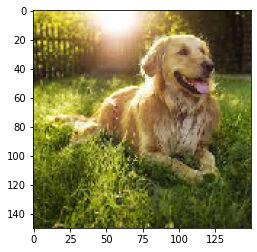

In [36]:
kelas = ['cat', 'cow', 'dog', 'sheep']

gambar = files.upload()

for dir in gambar.keys():

  img = image.load_img(dir, target_size = (w, h))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = py.expand_dims(x, axis = 0)

  img = utils.load_img(
      dir, target_size = (w, h)
  )

  img_array = utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print("{}" .format(kelas[py.argmax(score)]))